In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp
from scipy.interpolate import interp1d
import time

nside = 1024
lmax = 1024*3-1

def iqu2teb(IQU, nside, lmax=None):
    print('a')
    alms = hp.map2alm(IQU, lmax=lmax, pol=True)
    print('b')
    return hp.alm2map(alms, nside=nside, lmax=lmax, pol=False)

def teb2iqu(TEB, nside, lmax=None):
    alms = hp.map2alm(TEB, lmax=lmax, pol=False)
    return hp.alm2map(alms, nside=nside, lmax=lmax, pol=True)

# Signal

In [67]:
ell, cl = np.load('anafast_filtered_buzzard.npy')
np.save('gaussian_mock_EE_power.npy', np.vstack([ell, cl]))

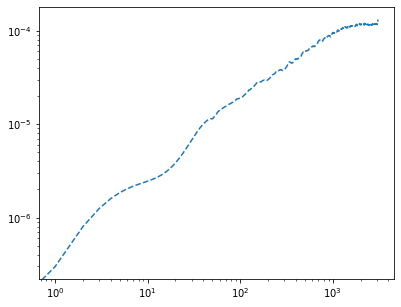

In [25]:
_ = plt.figure(figsize = (14,5))
_ = plt.subplot(1,2,1)
_ = plt.loglog(ell,cl*ell*ell, '--', label='EE')

In [26]:
mapE = hp.synfast(cl, nside=1024)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


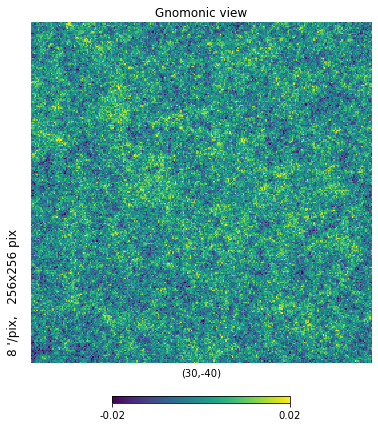

In [30]:
_ = hp.gnomview(mapE, reso = 8, rot=(30,-40), xsize = 256, min=-0.02,max=0.02)

In [28]:
test_power = hp.anafast(mapE)

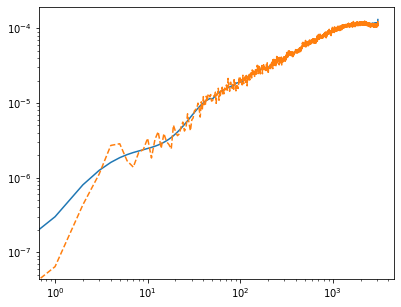

In [29]:
_ = plt.figure(figsize = (14,5))
_ = plt.subplot(1,2,1)
_ = plt.loglog(ell,cl*ell*ell)
_ = plt.loglog(ell,test_power*ell*ell, '--', label='EE')

In [31]:
teb_map = np.vstack([mapE*0,mapE,mapE*0])

In [32]:
tqu_map = teb2iqu(teb_map, 1024)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


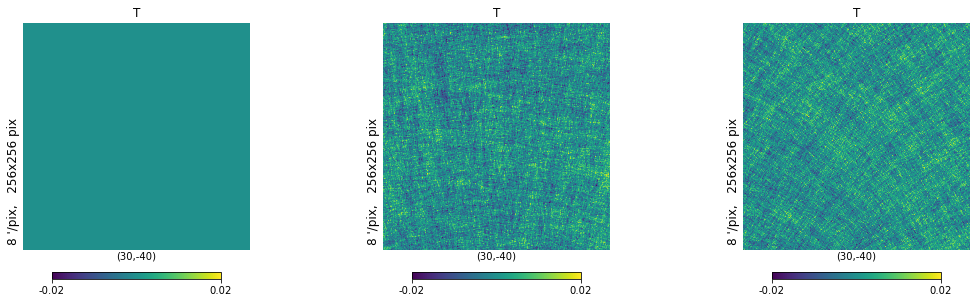

In [36]:
_ = plt.figure(figsize=(15,4))
_ = hp.gnomview(tqu_map[0], reso = 8, rot=(30,-40), xsize = 256, min=-0.02,max=0.02, title='T', sub=(1,3,1))
_ = hp.gnomview(tqu_map[1], reso = 8, rot=(30,-40), xsize = 256, min=-0.02,max=0.02, title='T', sub=(1,3,2))
_ = hp.gnomview(tqu_map[2], reso = 8, rot=(30,-40), xsize = 256, min=-0.02,max=0.02, title='T', sub=(1,3,3))

In [37]:
test_power_qu = hp.anafast(tqu_map)

In [39]:
test_power_qu.shape

(6, 3072)

In [40]:
test_power_qu

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.08236552e-07, ...,
         1.25646731e-11,  1.27628766e-11,  1.26640064e-11],
       [ 0.00000000e+00,  0.00000000e+00,  2.02151778e-21, ...,
         2.40617532e-16,  1.95130749e-16,  2.30956241e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.19758143e-15, ...,
        -1.40147911e-15,  1.80835656e-15, -5.31462119e-16],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

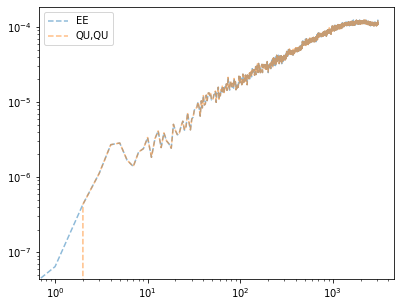

In [45]:
_ = plt.figure(figsize = (14,5))
_ = plt.subplot(1,2,1)
_ = plt.loglog(ell,test_power*ell*ell, '--', label='EE', alpha=0.5)
_ = plt.loglog(ell,test_power_qu[1]*ell*ell, '--', label='QU,QU', alpha=0.5), plt.legend()

# Add noise

In [47]:
noise_diag = hp.read_map('map_noise_cov_des1024_QU.fits', field=(0,1))

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [70]:
np.save('QU_noise_cov_diagonal.npy',noise_diag)

In [74]:
np.log10(np.max(noise_diag))

10.0

In [50]:
Q_noise = np.random.normal(0., np.sqrt(noise_diag[0]), hp.nside2npix(nside))
U_noise = np.random.normal(0., np.sqrt(noise_diag[1]), hp.nside2npix(nside))

In [59]:
Q_data = np.where(noise_diag[0]<10.,tqu_map[1] + Q_noise,0.)
U_data = np.where(noise_diag[1]<10.,tqu_map[2] + Q_noise,0.)

In [60]:
tqu_data = np.vstack([Q_data*0.,Q_data,U_data])

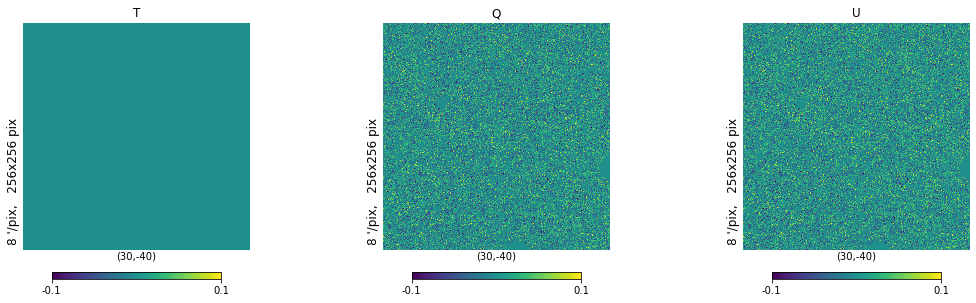

In [71]:
_ = plt.figure(figsize=(15,4))
_ = hp.gnomview(tqu_data[0], reso = 8, rot=(30,-40), xsize = 256, min=-0.1,max=0.1, title='T', sub=(1,3,1))
_ = hp.gnomview(tqu_data[1], reso = 8, rot=(30,-40), xsize = 256, min=-0.1,max=0.1, title='Q', sub=(1,3,2))
_ = hp.gnomview(tqu_data[2], reso = 8, rot=(30,-40), xsize = 256, min=-0.1,max=0.1, title='U', sub=(1,3,3))

In [72]:
np.save('gaussian_mock_E_map', mapE)
np.save('gaussian_mock_TQU_true_map', tqu_map)
np.save('gaussian_mock_TQU_noisy_data', tqu_data)